#Data Analysis 

#Section1_Tarannum

###Data Downloaded and data extraction/reading data into required data formats

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

Mounted at /content/drive


In [201]:
#!unzip "Data.zip"
cd "/content/drive/MyDrive/RAShip/"

/content/drive/MyDrive/RAShip


In [202]:
#Reading data from the data files
level_1a = pd.read_csv('level_1a.csv')
locations = pd.read_csv('locations.csv')
projects = pd.read_csv('projects.csv')
projects_ancillary = pd.read_csv('projects_ancillary.csv')
transactions = pd.read_csv('transactions.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (87,88,98,126,133,154,158,163) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


1. level_1a.csv -> It has all the projects, project details, conutry wise and geocoded locations, along with the project start/end timelines, the amount disbursed and the budget allocated.
2. locations.csv -> Contains the exact geocoded location longitudes and latitudes for the places having projects mentioned in level_1a 
3. projects.csv -> It has project titles along with the allocated budgets
4. transactions.csv -> Historical project transaction ids along with the timelines




The unit of measurement for Level_1a could be USD against the project disbursments, commitments, since the goelocations have the degree encodings and transaction timelines are already encoded in YY_MM_DD formats.

In [13]:
level_1a.head()

,project_id,project_location_id,precision_code,geoname_id,place_name,latitude,longitude,location_type_code,location_type_name,gazetteer_adm_code,...,recipients_iso3,ad_sector_codes,ad_sector_names,status,transactions_start_year,transactions_end_year,total_commitments,total_disbursements,even_split_commitments,even_split_disbursements
0,P001807,P001807_7874471,3,7874471,Chemba District,-17.16474,34.88777,ADM2,second-order administrative division,6295630|6255146|MZ|05|7874471,...,MOZ,151|160|210|140,Water supply and sanitation|Other social infra...,Completion,2003,2009,5.057693e+07,5.439460e+07,829129.937379,891714.827897
1,P001807,P001807_7874473,3,7874473,Maringué District,-17.96355,34.39219,ADM2,second-order administrative division,6295630|6255146|MZ|05|7874473,...,MOZ,151|160|210|140,Water supply and sanitation|Other social infra...,Completion,2003,2009,5.057693e+07,5.439460e+07,829129.937379,891714.827897
2,P001807,P001807_7670756,3,7670756,Matutiune District,-26.43418,32.58820,ADM2,second-order administrative division,6295630|6255146|MZ|04|7670756,...,MOZ,151|160|210|140,Water supply and sanitation|Other social infra...,Completion,2003,2009,5.057693e+07,5.439460e+07,829129.937379,891714.827897
3,P001807,P001807_7873988,3,7873988,Nicodala District,-17.60300,36.81400,ADM2,second-order administrative division,6295630|6255146|MZ|09|7873988,...,MOZ,151|160|210|140,Water supply and sanitation|Other social infra...,Completion,2003,2009,5.057693e+07,5.439460e+07,829129.937379,891714.827897
4,P001807,P001807_1053142,3,1053142,Alto Molócuè,-15.64932,37.66384,ADM2,second-order administrative division,6295630|6255146|MZ|09|1053142,...,MOZ,151|160|210|140,Water supply and sanitation|Other social infra...,Completion,2003,2009,5.057693e+07,5.439460e+07,829129.937379,891714.827897


I have calculated the Country-Year level information of all the projects mentioned in the data set. I have used transactions_start_year in order to calculate the Active projects because this provides the information of projects that have been already started and are currenty in progress. 

In [14]:
#data aggregation based on the recipient country and the transaction year followed by
aggregated_df = level_1a.groupby(['recipients','transactions_start_year']).size().reset_index().rename(columns={0:'Active Projects'})

Projects have been collapsed on Country-year level

In [16]:
aggregated_df.head(10)

,recipients,transactions_start_year,Active Projects
0,Afghanistan,2002,69
1,Afghanistan,2003,161
2,Afghanistan,2004,61
3,Afghanistan,2005,72
4,Afghanistan,2006,285
5,Afghanistan,2007,11
6,Afghanistan,2008,26
7,Afghanistan,2009,73
8,Afghanistan,2010,108
9,Afghanistan,2011,102


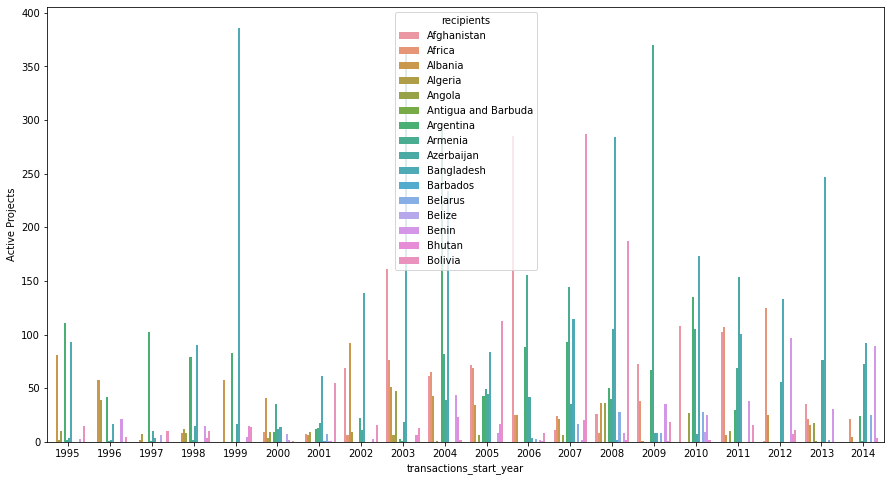

In [17]:
#testing the data file for different years and recepients
plt.figure(figsize=(15,8))
sns.barplot(x="transactions_start_year", y="Active Projects", data=aggregated_df[:200], hue='recipients')
#sns.set(rc={'figure.figsize':(8,8)})

In [18]:
final_df = aggregated_df.sort_values(by=['Active Projects'], ascending=False)

In [19]:
final_df

,recipients,transactions_start_year,Active Projects
962,Lebanon,2000,697
797,India,2010,627
1296,Nigeria,2008,506
231,Brazil,2005,461
396,China,2005,429
...,...,...,...
956,Latvia,2009,1
957,Latvia,2010,1
958,Latvia,2011,1
188,Bolivia,2000,1


Plotted the top 10 receipients of the project-year level active projects list year wise

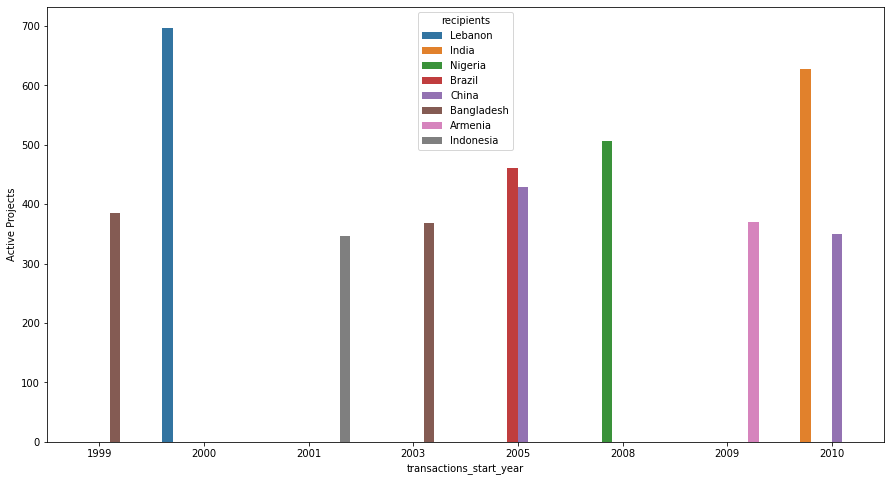

In [20]:
plt.figure(figsize=(15,8))
sns.barplot(x="transactions_start_year", y="Active Projects", data=final_df[:10], hue='recipients')

## Section2_Tarannum

Collapsed level_1a to Pakistan level

In [21]:
#sorting projects based on Pakistan only
Pak_projects = level_1a.loc[level_1a.recipients == "Pakistan",:] 

Active projects of year 1999, based on transactions_start_year following the same reaosning as explained above

In [22]:
Pak_projects_year= Pak_projects.loc[Pak_projects.transactions_start_year==1999,:]

In [23]:
Pak_projects_year.head(20)

,project_id,project_location_id,precision_code,geoname_id,place_name,latitude,longitude,location_type_code,location_type_name,gazetteer_adm_code,...,recipients_iso3,ad_sector_codes,ad_sector_names,status,transactions_start_year,transactions_end_year,total_commitments,total_disbursements,even_split_commitments,even_split_disbursements
31665,P049791,P049791_1184051,3,1184051,Badīn District,24.72437,68.87457,ADM2,second-order administrative division,6295630|6255147|PK|05|1184051,...,PAK,210|311|160|240|140,Water supply and sanitation|Other social infra...,Completion,1999,2004,1.174800e+08,1.184664e+08,1.174800e+07,1.184664e+07
31666,P049791,P049791_1163052,3,1163052,Kech,26.01792,63.11031,ADM2,second-order administrative division,6295630|6255147|PK|02|1163052,...,PAK,210|311|160|240|140,Water supply and sanitation|Other social infra...,Completion,1999,2004,1.174800e+08,1.184664e+08,1.174800e+07,1.184664e+07
31667,P049791,P049791_7418965,3,7418965,Khushāb,32.18259,72.11100,ADM2,second-order administrative division,6295630|6255147|PK|04|7418965,...,PAK,210|311|160|240|140,Water supply and sanitation|Other social infra...,Completion,1999,2004,1.174800e+08,1.184664e+08,1.174800e+07,1.184664e+07
31668,P049791,P049791_1163602,3,1163602,Thar Pārkar,24.82085,70.18002,ADM2,second-order administrative division,6295630|6255147|PK|05|1163602,...,PAK,210|311|160|240|140,Water supply and sanitation|Other social infra...,Completion,1999,2004,1.174800e+08,1.184664e+08,1.174800e+07,1.184664e+07
31669,P049791,P049791_1184196,4,1184196,Azad Kashmir,33.94718,73.91040,ADM1,first-order administrative division,6295630|6255147|PK|06,...,PAK,210|311|160|240|140,Water supply and sanitation|Other social infra...,Completion,1999,2004,1.174800e+08,1.184664e+08,1.174800e+07,1.184664e+07
31670,P049791,P049791_1183606,4,1183606,Balochistān,28.47849,65.64355,ADM1,first-order administrative division,6295630|6255147|PK|02,...,PAK,210|311|160|240|140,Water supply and sanitation|Other social infra...,Completion,1999,2004,1.174800e+08,1.184664e+08,1.174800e+07,1.184664e+07
31671,P049791,P049791_1179245,4,1179245,Federally Administered Tribal Areas,33.01455,69.99925,ADM1,first-order administrative division,6295630|6255147|PK|01,...,PAK,210|311|160|240|140,Water supply and sanitation|Other social infra...,Completion,1999,2004,1.174800e+08,1.184664e+08,1.174800e+07,1.184664e+07
31672,P049791,P049791_1168873,4,1168873,Khyber Pakhtunkhwa,34.45993,72.50237,ADM1,first-order administrative division,6295630|6255147|PK|03,...,PAK,210|311|160|240|140,Water supply and sanitation|Other social infra...,Completion,1999,2004,1.174800e+08,1.184664e+08,1.174800e+07,1.184664e+07
31673,P049791,P049791_1167710,4,1167710,Punjab,30.86017,72.31976,ADM1,first-order administrative division,6295630|6255147|PK|04,...,PAK,210|311|160|240|140,Water supply and sanitation|Other social infra...,Completion,1999,2004,1.174800e+08,1.184664e+08,1.174800e+07,1.184664e+07
31674,P049791,P049791_1164807,4,1164807,Sindh,26.13456,68.76960,ADM1,first-order administrative division,6295630|6255147|PK|05,...,PAK,210|311|160|240|140,Water supply and sanitation|Other social infra...,Completion,1999,2004,1.174800e+08,1.184664e+08,1.174800e+07,1.184664e+07


In [ ]:
#pip install geopandas

1. Downloaded a shape file from the provided link 
2. Selected a Pakistan-1999 data and plotted it using the shape file

In [31]:
!unzip "geolocation.zip"

Archive:  geolocation.zip
replace gk656fb4690.cst? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [32]:
#importing the downloaded shapefile
import geopandas as gpd
shapefile = gpd.read_file("/content/drive/MyDrive/RAShip/gk656fb4690.shp")
print(shapefile)

      id_0  iso    name_0  id_1        name_1  id_2         name_2   id_3  \
0    171.0  PAK  Pakistan   1.0  Azad Kashmir   1.0   Azad Kashmir    1.0   
1    171.0  PAK  Pakistan   1.0  Azad Kashmir   1.0   Azad Kashmir    2.0   
2    171.0  PAK  Pakistan   1.0  Azad Kashmir   1.0   Azad Kashmir    3.0   
3    171.0  PAK  Pakistan   1.0  Azad Kashmir   1.0   Azad Kashmir    4.0   
4    171.0  PAK  Pakistan   1.0  Azad Kashmir   1.0   Azad Kashmir    5.0   
..     ...  ...       ...   ...           ...   ...            ...    ...   
136  171.0  PAK  Pakistan   8.0          Sind  30.0    Mirpur Khas  135.0   
137  171.0  PAK  Pakistan   8.0          Sind  31.0  Rann of Kutch  136.0   
138  171.0  PAK  Pakistan   8.0          Sind  32.0         Sukkur  138.0   
139  171.0  PAK  Pakistan   8.0          Sind  32.0         Sukkur  139.0   
140  171.0  PAK  Pakistan   8.0          Sind  32.0         Sukkur  140.0   

              name_3  ccn_3 cca_3    type_3 engtype_3 nl_name_3  varname_3 

In [34]:
pip install pyshp

     |████████████████████████████████| 44 kB 987 kB/s 


In [36]:
#initializing the basemap for shape file
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))

In [38]:
shp_path = "/content/drive/MyDrive/RAShip/gk656fb4690.shp"
sf = shp.Reader(shp_path)

In [40]:
#reading the shapefile as a dataframe for better data analysis and visualization
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [41]:
sf.records()[1]
df = read_shapefile(sf)
df.shape

(141, 16)

In [42]:
df.sample(5) 

,id_0,iso,name_0,id_1,name_1,id_2,name_2,id_3,name_3,ccn_3,cca_3,type_3,engtype_3,nl_name_3,varname_3,coords
69,171.0,PAK,Pakistan,5.0,N.W.F.P.,17.0,Peshawar,70.0,Peshawar,0.0,,District,District,,,"[(71.41643524169935, 34.15036010742202), (71.4..."
48,171.0,PAK,Pakistan,5.0,N.W.F.P.,11.0,Dera Ismail Khan,49.0,Tank,0.0,,District,District,,,"[(70.15062713623065, 32.00042343139658), (70.1..."
133,171.0,PAK,Pakistan,8.0,Sind,30.0,Mirpur Khas,133.0,Mithi,0.0,,District,District,,,"[(70.67935180664064, 25.614030838012777), (70...."
25,171.0,PAK,Pakistan,2.0,Baluchistan,5.0,Quetta,25.0,Pishin,0.0,,District,District,,,"[(67.39846801757831, 31.19865989685067), (67.4..."
88,171.0,PAK,Pakistan,7.0,Punjab,22.0,Gujranwala,87.0,Gujarat,0.0,,District,District,,,"[(73.68702697753925, 32.35254669189457), (73.6..."


In [47]:
#getting the indices of locations from the shape file dataframe created above
df[df.name_1.str.contains('Sind', na=False)].index[0]

102

In [49]:
sel = [119, 20,109, 36,102 , 8 ]

In [50]:
#function to plot the multiple locations from the designated shapefile
def plot_map_fill_multiples_ids(title, comuna, sf, 
                                               x_lim = None, 
                                               y_lim = None, 
                                               figsize = (11,9), 
                                               color = 'r'):    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color)
             
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        plt.text(x0, y0, id, fontsize=10)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

<Figure size 792x648 with 0 Axes>

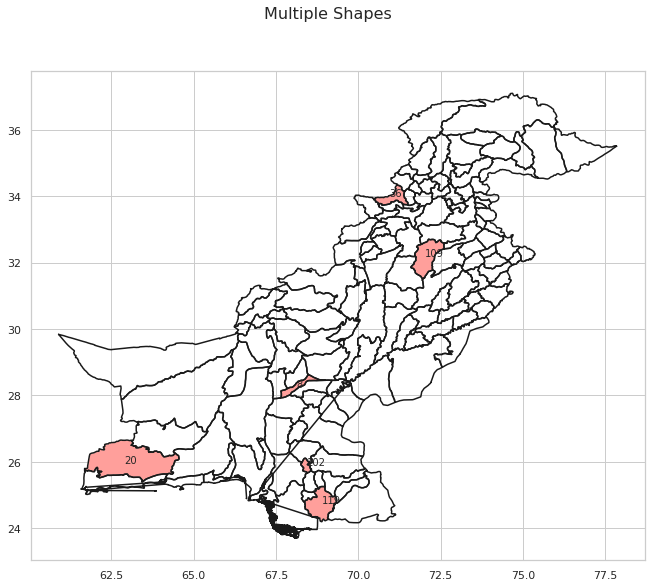

In [55]:
plot_map_fill_multiples_ids("Multiple Shapes", sel,sf)

Selected Pakistan_2003 to visualize a heatmap for the project_disbursements among different locations 

In [61]:
Pak_projects_year_test= Pak_projects.loc[Pak_projects.transactions_start_year==2003,:]

In [62]:
Pak_projects_year_test

,project_id,project_location_id,precision_code,geoname_id,place_name,latitude,longitude,location_type_code,location_type_name,gazetteer_adm_code,...,recipients_iso3,ad_sector_codes,ad_sector_names,status,transactions_start_year,transactions_end_year,total_commitments,total_disbursements,even_split_commitments,even_split_disbursements
13809,P082977,P082977_1185055,3,1185055,Abbottābād,34.09497,73.26043,ADM2,second-order administrative division,6295630|6255147|PK|03|1185055,...,PAK,140|311|160|240|210,Water supply and sanitation|Other social infra...,Completion,2003,2011,2.866026e+08,6.463274e+08,2.605478e+06,5.875704e+06
13810,P082977,P082977_1184248,3,1184248,Attock District,33.50812,72.33416,ADM2,second-order administrative division,6295630|6255147|PK|04|1184248,...,PAK,140|311|160|240|210,Water supply and sanitation|Other social infra...,Completion,2003,2011,2.866026e+08,6.463274e+08,2.605478e+06,5.875704e+06
13811,P082977,P082977_6641896,3,6641896,Awārān,26.21157,65.42944,ADM2,second-order administrative division,6295630|6255147|PK|02|6641896,...,PAK,140|311|160|240|210,Water supply and sanitation|Other social infra...,Completion,2003,2011,2.866026e+08,6.463274e+08,2.605478e+06,5.875704e+06
13812,P082977,P082977_1184051,3,1184051,Badīn District,24.72438,68.87457,ADM2,second-order administrative division,6295630|6255147|PK|05|1184051,...,PAK,140|311|160|240|210,Water supply and sanitation|Other social infra...,Completion,2003,2011,2.866026e+08,6.463274e+08,2.605478e+06,5.875704e+06
13813,P082977,P082977_1183882,3,1183882,Bahāwalnagar District,29.64106,73.02531,ADM2,second-order administrative division,6295630|6255147|PK|04|1183882,...,PAK,140|311|160|240|210,Water supply and sanitation|Other social infra...,Completion,2003,2011,2.866026e+08,6.463274e+08,2.605478e+06,5.875704e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37178,P074856,P074856_1168873,4,1168873,Khyber Pakhtunkhwa,34.45993,72.50237,ADM1,first-order administrative division,6295630|6255147|PK|03,...,PAK,120,Health,Completion,2003,2009,4.468833e+07,4.298635e+07,2.793020e+06,2.686647e+06
37179,P074856,P074856_1167710,4,1167710,Punjab,30.86017,72.31976,ADM1,first-order administrative division,6295630|6255147|PK|04,...,PAK,120,Health,Completion,2003,2009,4.468833e+07,4.298635e+07,2.793020e+06,2.686647e+06
57844,P074856,P074856_1168579,6,1168579,Pakistan,NaN,NaN,PCLI,independent political entity,6295630|6255147|PK,...,PAK,120,Health,Completion,2003,2009,4.468833e+07,4.298635e+07,2.793020e+06,2.686647e+06
58980,P077288,P077288_1168579,8,1168579,Pakistan,NaN,NaN,PCLI,independent political entity,6295630|6255147|PK,...,PAK,151,"Government and civil society, general",Completion,2003,2009,4.371291e+06,3.110543e+06,4.371291e+06,3.110543e+06


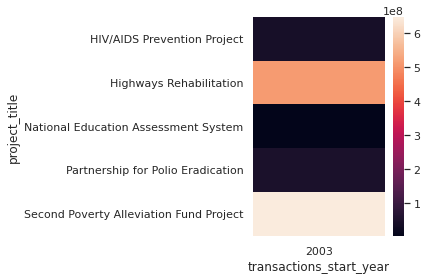

In [63]:
# create pivot table
piv = pd.pivot_table(Pak_projects_year_test, values="total_disbursements",index=["project_title"], columns=["transactions_start_year"])
#plot pivot table as heatmap using seaborn
ax = sns.heatmap(piv)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=0 )
plt.tight_layout()
plt.show()

##Section3_Tarannum

Extracted the designated sheet from data workbook "Global_CDF2.0"

In [64]:
data = pd.read_excel(r'AidDatasGlobalChineseDevelopmentFinanceDataset_v2.0.xlsx', sheet_name = "Global_CDF2.0" )

In [66]:
datafarme = pd.DataFrame(data)

Subset the data to Pakistan Only

In [67]:
Pak_projects_CDF= datafarme.loc[datafarme.Recipient == "Pakistan",:] 

Merge the data for level_1a and CDF data for Pakistan_year = Pakistan_2015 level

In [121]:
#getting the Project_year level information along with the assigned geographic locations
pak_cdf2 = Pak_projects_CDF.groupby(['Title', 'Implementation Start Year', 'Geographic Location']).size().reset_index().rename(columns={0:'Active Projects'})

In [124]:
pak_cdf2

,Title,Implementation Start Year,Geographic Location,Active Projects
0,CDB provides $252 million loan for 99 MW Jhimp...,2015.0,The UEP wind farm is located at Jhimpir in Tha...,1
1,CDB provides $54 million loan for Duddar Lead-...,2005.0,The Duddar Lead-Zinc Mine Project is located i...,1
2,CDB provides a $107.7 million loan for 49.5 MW...,2012.0,"This 49.5MW wind farm is located in Jhampir, n...",1
3,"CDB, China Eximbank, and Silk Road Fund provid...",2016.0,"The project is located on Jhelum River, near K...",1
4,China Development Bank provides $84.1 million ...,2016.0,"The project is located in Jhimpir Village, Tha...",1
...,...,...,...,...
77,Mayor of Beijing donates 50000 USD for flood r...,2010.0,Islamabad,1
78,PowerChina trains 100 Pakistani engineers,2016.0,"Gansu Province, China",1
79,RMB 585 million government concessional loan [...,2012.0,This project involved the realignment of a 24 ...,1
80,Syndicate of Chinese banks provides $1.44 bill...,2014.0,This power plant is located about 12 miles fro...,1


In [174]:
pak_proj2 = Pak_projects.groupby(['project_title', 'transactions_start_year','place_name']).size().reset_index().rename(columns={0:'Active Projects'})

In [175]:
pak_proj2

,project_title,transactions_start_year,place_name,Active Projects
0,A Trade and Transport Facilitation Project,2001,Karachi,1
1,A Trade and Transport Facilitation Project,2001,Pakistan,1
2,A Trade and Transport Facilitation Project,2001,Port Muhammad Bin Qāsim,1
3,AJK Community Infrastructure and Services Project,2002,Azad Kashmir,1
4,AJK Community Infrastructure and Services Project,2002,Bhimbar District,1
...,...,...,...,...
706,Third Pakistan Poverty Alleviation Fund Project,2009,Pakistan,1
707,Trade and Transport Facilitation II,2009,Gwadar,1
708,Trade and Transport Facilitation II,2009,Karachi,1
709,Trade and Transport Facilitation II,2009,Port Muhammad Bin Qāsim,1


In [176]:
pak_cdf2.columns = pak_proj2.columns


In [178]:
final = pak_cdf2.merge(pak_proj2, on = "transactions_start_year")

In [179]:
final.head(2)

,project_title_x,transactions_start_year,place_name_x,Active Projects_x,project_title_y,place_name_y,Active Projects_y
0,CDB provides $54 million loan for Duddar Lead-...,2005.0,The Duddar Lead-Zinc Mine Project is located i...,1,AJK-Community Infrastructure and Services Proj...,Bāgh District,1
1,CDB provides $54 million loan for Duddar Lead-...,2005.0,The Duddar Lead-Zinc Mine Project is located i...,1,AJK-Community Infrastructure and Services Proj...,Muzaffarābād District,1


Map showing the location of WB and Chinese aid projects on the Pakistan map for 2011


In [180]:
pak_cdf2_year= pak_cdf2.loc[pak_cdf2.transactions_start_year==2011,:]

In [181]:
pak_proj2_year= pak_proj2.loc[pak_proj2.transactions_start_year==2011,:]


In [182]:
pak_cdf2_year

,project_title,transactions_start_year,place_name,Active Projects
10,China Eximbank participates in a $464 million ...,2011.0,The Guddo Thermal Power Plant is located in th...,1
36,"China donates 7,000 tents worth 30 million RMB...",2011.0,Sindh province,1
62,Chinese Government provides RMB 60 million gra...,2011.0,More detailed locational information can be fo...,1
63,Chinese Government provides RMB 7 million for ...,2011.0,More detailed locational information can be fo...,1


In [183]:
pak_proj2_year

,project_title,transactions_start_year,place_name,Active Projects
262,Pakistan - Punjab Education Sector Project - AF,2011,Punjab,1
263,Pakistan - Sindh Education Sector Additional F...,2011,Sindh,1
264,Pakistan - Third Partnership for Polio Eradica...,2011,Pakistan,1
265,Pakistan Flood Emergency Cash Transfer Project,2011,Pakistan,1
278,Pakistan: Khyber Pakhtunkhwa (KP) and Federall...,2011,Buner District,1
279,Pakistan: Khyber Pakhtunkhwa (KP) and Federall...,2011,Bājaur Agency,1
280,Pakistan: Khyber Pakhtunkhwa (KP) and Federall...,2011,Lower Dīr District,1
281,Pakistan: Khyber Pakhtunkhwa (KP) and Federall...,2011,Mohmand Agency,1
282,Pakistan: Khyber Pakhtunkhwa (KP) and Federall...,2011,Shāngla,1
283,Pakistan: Khyber Pakhtunkhwa (KP) and Federall...,2011,Swāt District,1


In [194]:
# intialise data of lists.
data = {'longitude':[69.7012,68.5247, 73.2205, 74.3152, 72.6151, 76.5249, 71.2874, 65.889, 60.8097,71.8749 ],
        'latitude':[28.4247,25.8943,34.4407,  31.5708, 34.3943, 30.7865,34.5356, 23.987, 23.9161,35.1977 ]}
 
# Create DataFrame
df = pd.DataFrame(data)

In [ ]:
#pip install basemap

location of WB and Chinese aid projects on the Pakistan map for 2011


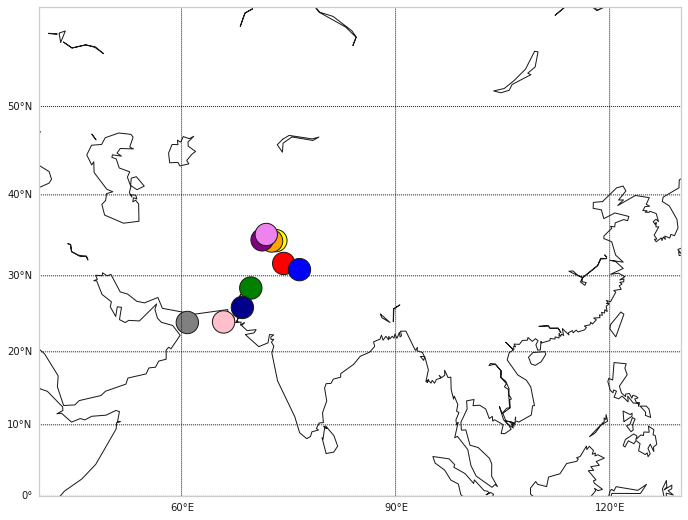

In [198]:
#plotting the collective geolocations based on the Long and Latit coordinates for the merged dataframe coordinates
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig = plt.figure(figsize=(12,9))

m = Basemap(projection='mill',
           llcrnrlat = 0,
           urcrnrlat = 60,
           llcrnrlon = 40,
           urcrnrlon = 130,
           resolution = 'c')

m.drawcoastlines()
m.drawparallels(np.arange(-90,90,10),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])

sites_lat_y = df['latitude'].tolist()
sites_lon_x = df['longitude'].tolist()

colors = ['green', 'darkblue', 'yellow', 'red', 'orange', 'blue', 'purple', 'pink', 'grey', 'violet']
print("location of WB and Chinese aid projects on the Pakistan map for 2011")
m.scatter(sites_lon_x,sites_lat_y,latlon=True, s=500, c=colors, marker='o', alpha=1, edgecolor='k', linewidth=1, zorder=2)
